<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 03

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Ike Mercado Huanaque

__Rol__: 201610025-3

**Indicaciones**: Para el **Ejercicio 1** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente, en ambos casos cada gráfico debe tener elementos mínimos como:
- Título
- Nombre de los ejes en formato _amigable_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `cost_of_living_index` se espera que el eje del gráfico tenga por nombre `Índice de Costo de Vida`.
- Colores adecuados al tipo de datos.
- Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.

Para el **Ejercicio 2** es obligación utilizar `altair`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from vega_datasets import data
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.themes.enable('opaque')

%matplotlib inline

## 1. Índices de Costos de Vida

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [2]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[2]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 1.1 (5 pts)

Explique lo que se hizo en la celda anterior detalladamente.

_## TU RESPUESTA AQUÍ ##_

Se crea una lista de años llamado years. Luego se crea un dataframe llamada life_cost, para ello se siguen los siguientes pasos:
1) Se carga un dataframe de un año en específico a partir de una página web dependiente de ese mismo año. 

2) Se cambian los espacios por guiones bajo en los nombres de las columnas. 

3) Se crea la columna rank correspondiente al ranking de cada ciudad

4) Se indexa el dataframe por el ranking.

Los pasos anteriores se aplica para cada año en la lista years y se concatena, generando asi dos indices, los años y el ranking. Luego se renombran los ejes a "year" y "rank", y se resetea los indices para que el dataframe final quede con dos columnas añadidas, una columna "year" y otro "rank".

### Ejercicio 1.2 (10 pts)

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

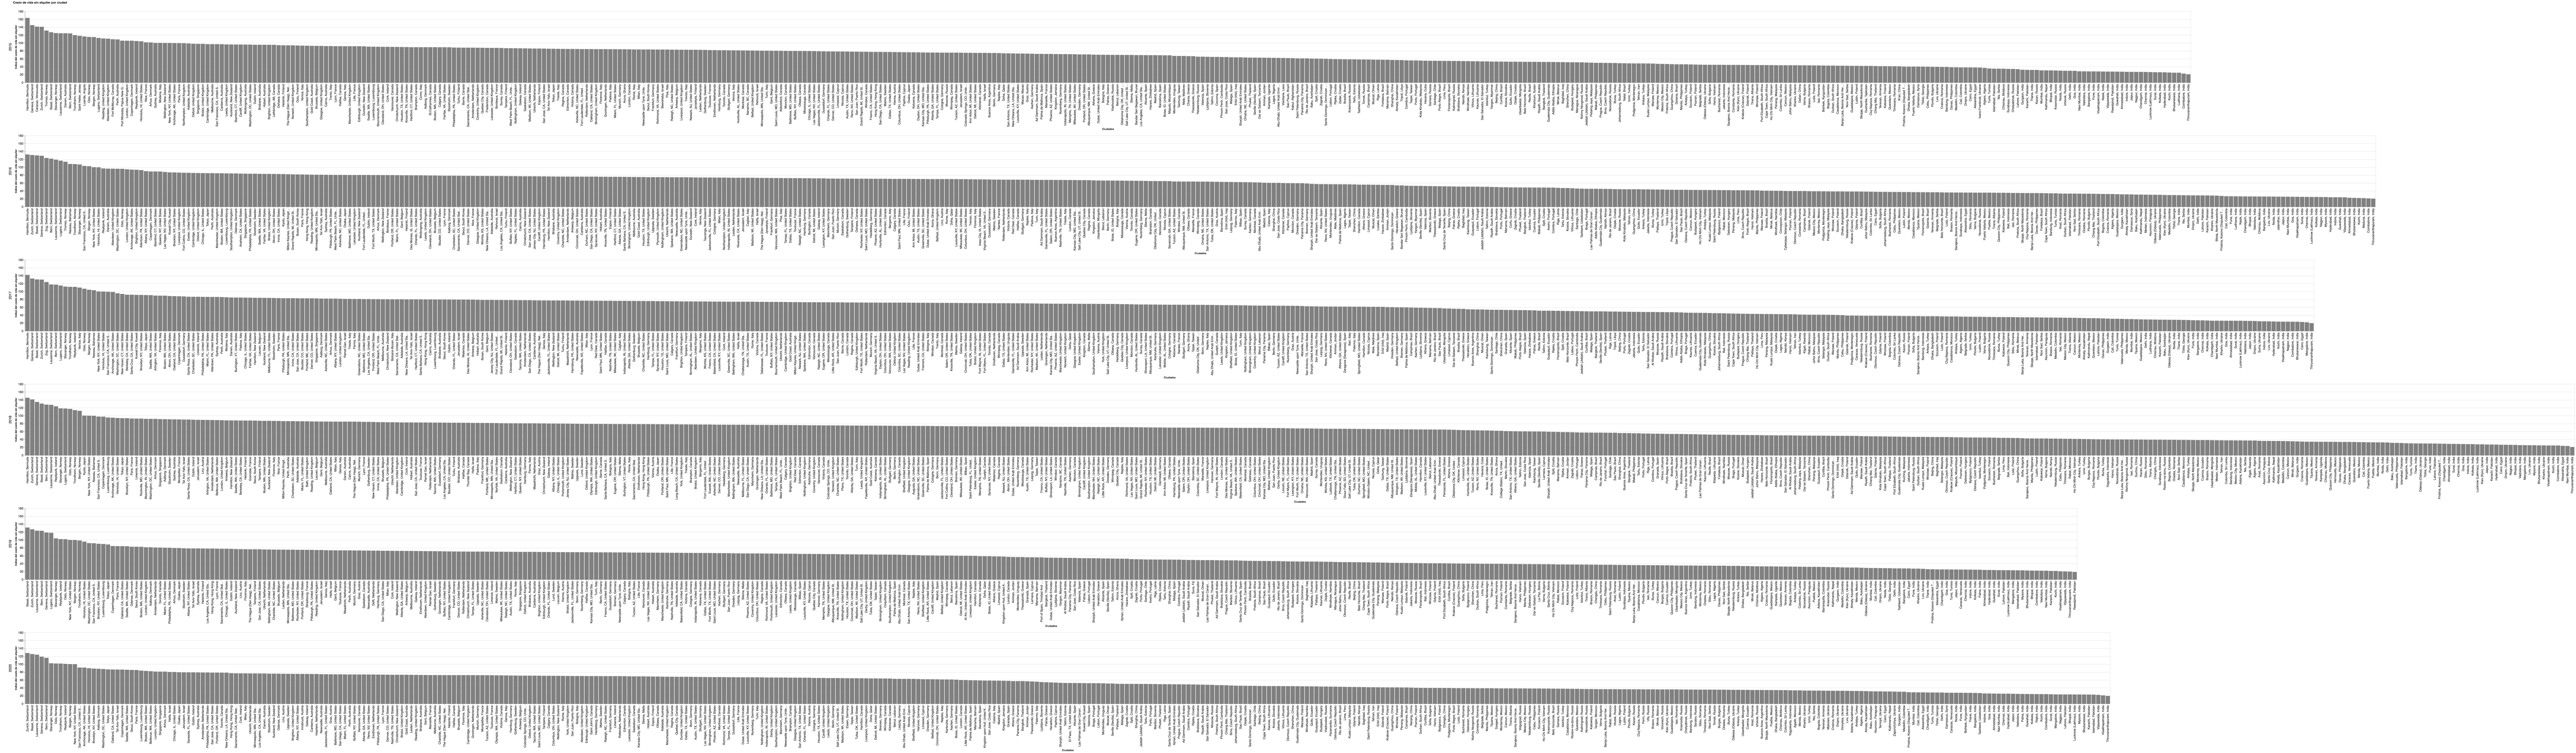

In [3]:
alt.Chart(life_cost).mark_bar(color="grey").encode(
    x = alt.X('city:N',axis = alt.Axis(labelFontSize=13),sort=alt.EncodingSortField(field='rank:Q', order='ascending'),title="Ciudades"),
    y = alt.Y('cost_of_living_index:Q',axis = alt.Axis(labelFontSize=13),title="Indice del costo de vida sin alquiler"), # FIXEAR LABELS
    row = alt.Row('year:N',title=" ",header=alt.Header(labelFontSize=15)),
).resolve_scale(
    x="independent"
).properties(title=alt.TitleParams(text='Costo de vida sin alquiler por ciudad',dx=50,dy=-20))

_## TU RESPUESTA AQUÍ ##_
DE estos graficos, no hay mucha información por concluir ya que las ciudades con alto indice de costo van variando conforme pasan los años, además que son demasiadas ciudades a analizar. Lo único que se podría concluir es que el maximo costo de vida sin alquiler a disminuyendo conforme pasan los años, más todavía falta ver otros gráficos para sacar una conclusión así.

### Ejercicio 1.3 ( pts)

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [4]:
rol_seed = 201610025  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

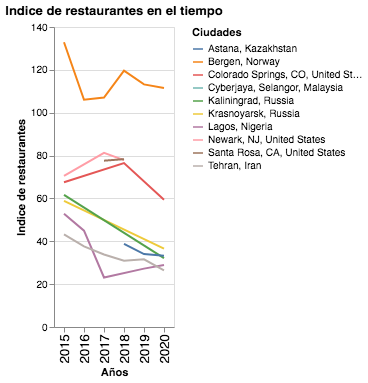

In [5]:
alt.Chart(life_cost[lambda x: x["city"].isin(my_cities)]).mark_line().encode(
    x = alt.X('year:O',title='Años',axis=alt.Axis(labelFontSize=13)),
    y = alt.Y('restaurant_price_index:Q',title='Indice de restaurantes'),
    color = alt.Color('city:N',title='Ciudades')
).properties(title=alt.TitleParams(text='Indice de restaurantes en el tiempo')
)

_## TU RESPUESTA AQUÍ ##_

Podríamos decir que ciertas ciudades disminuyen su indice de restaurantes con el paso de los años, como Krasnoyarsk, Astana, Kaliningrad, Lagos y Tehran. Otras en en cambio aumentan su indice y a partir de cierto año lo disminuyen como en el caso de Newark y Colorado, en el caso de Santa Rosa mantiene su indice y en el caso de Bergen, tiene un comportamiento irregular, ya que desciende, luego asciende, luego vuelve a descender y así. Sólo se grafican una muestra de ciudades porque graficarlas todas generaría una gran cantidad de curvas que sería muy difícil de analizar, además de que como vimos aquí, cada ciudad tiene un comportamiento diferente lo que haría más difícil concluir algo.

### Ejercicio 1.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [6]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [7]:
source = (life_cost[lambda x: x["city"].isin(my_cities)]
          .rename(columns=redable_index_names)
          .drop(["year","rank"],axis=1)
          .groupby(["city"])
          .agg('mean')
          .round(2)
          .reset_index()
          .melt(id_vars=["city"])
         )
source.head()

city       variable   value
0                   Astana, Kazakhstan  Costo de Vida   33.89
1                       Bergen, Norway  Costo de Vida  105.72
2  Colorado Springs, CO, United States  Costo de Vida   73.86
3        Cyberjaya, Selangor, Malaysia  Costo de Vida   39.83
4                  Kaliningrad, Russia  Costo de Vida   45.89

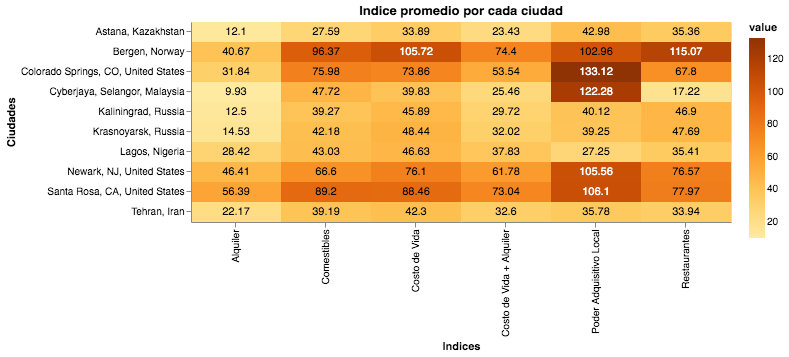

In [8]:
source = (life_cost[lambda x: x["city"].isin(my_cities)]
          .rename(columns=redable_index_names)
          .drop(["year","rank"],axis=1)
          .groupby(["city"])
          .agg('mean')
          .round(2)
          .reset_index()
          .melt(id_vars=["city"])
         )
base = alt.Chart(source).encode(
    alt.X('variable:N', scale=alt.Scale(paddingInner=0),title = 'Indices'),
    alt.Y('city:N', scale=alt.Scale(paddingInner=0),title='Ciudades'),
).properties(title=alt.TitleParams(text='Indice promedio por cada ciudad')
)

# Configure heatmap
heatmap = base.mark_rect().encode(
    color=alt.Color('value:Q',
        scale=alt.Scale(scheme='yelloworangebrown'),
        legend=alt.Legend(direction='vertical')
    )
)

# Configure text
text = base.mark_text(baseline='middle').encode(
    text='value:Q',
    color=alt.condition(
        alt.datum.value > 105,
        alt.value('white'),
        alt.value('black')
    )
)

# Draw the chart
heatmap + text

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 1.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [9]:
var = life_cost["city"].apply(lambda x: pd.Series(x.split(", ")[-1]))
life_cost = life_cost.assign(country = var[0])
life_cost

year  rank                       city  cost_of_living_index  rent_index  \
0     2015     1          Hamilton, Bermuda                163.55      120.02   
1     2015     2        Geneva, Switzerland                145.18       81.46   
2     2015     3         Caracas, Venezuela                141.41       60.46   
3     2015     4        Zurich, Switzerland                141.06       66.39   
4     2015     5             Tromso, Norway                131.45       55.80   
...    ...   ...                        ...                   ...         ...   
2842  2020   436          Karachi, Pakistan                 23.07        4.57   
2843  2020   437        Islamabad, Pakistan                 22.95        6.00   
2844  2020   438          Vijayawada, India                 22.31        5.09   
2845  2020   439       Visakhapatnam, India                 21.09        4.11   
2846  2020   440  Thiruvananthapuram, India                 19.77        4.33   

      cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                             142.28           191.71                  132.91   
1                             114.05           161.14                  141.23   
2                             101.86           155.16                  122.27   
3                             104.57           148.56                  146.90   
4                              94.48           127.72                  137.08   
...                              ...              ...                     ...   
2842                           14.22            20.03                   19.20   
2843                           14.84            22.23                   17.22   
2844                           14.07            23.04                   13.19   
2845                           12.97            21.43                   13.52   
2846                           12.38            20.31                   10.66   

      local_purchasing_power_index      country  
0                            69.79      Bermuda  
1                           130.21  Switzerland  
2                             9.73    Venezuela  
3                           133.91  Switzerland  
4                           132.41       Norway  
...                            ...          ...  
2842                         29.27     Pakistan  
2843                         30.28     Pakistan  
2844                         47.38        India  
2845                         52.04        India  
2846                         62.74        India  

[2847 rows x 10 columns]

In [10]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

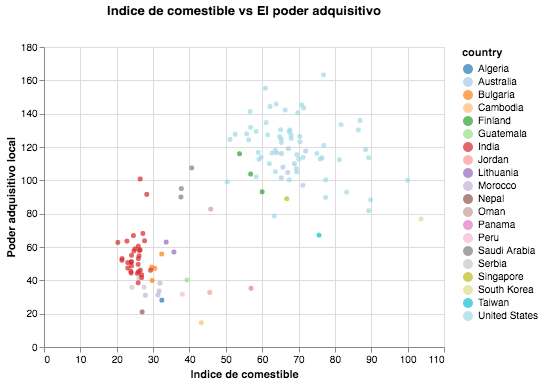

In [11]:
source = life_cost.query('year==2020')[lambda x: x["country"].isin(my_countries)]
alt.Chart(source).mark_circle(size=25).encode(
    x=alt.X('groceries_index:Q',title='Indice de comestible'),
    y=alt.Y('local_purchasing_power_index:Q',title='Poder adquisitivo local'),
    color=alt.Color('country:N',
        scale=alt.Scale(scheme='category20'),
        legend=alt.Legend(direction='vertical')
    )
).properties(title=alt.TitleParams(text='Indice de comestible vs El poder adquisitivo',dy=-20))
#El titulo lo puse así, porque tiene sentido comparar como funciona el indice de comestible
#en funcion del poder adquisitivo de un pais

¿Qué comentarios puedes entregar al comparar los países seleccionados?

_## TU RESPUESTA AQUÍ ##_
Se puede concluir que paises con un mayor poder adquisitivo local tienen un mayor indice de comestible, como se puede ver en paises como Estados Unidos, Finlandia y Taiwan su indice de comestible y su poder adquisitivo son altos mientras que paises como India y Bulgaria tiene un bajo poder adquisitivo e indice de comestible. En resumente el Indice de comestible y el poder adquisitivo local de un pais son directamente proporcionales.

### Ejercicio 1.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [12]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [13]:
life_cost = pd.merge(life_cost,countries,how = "inner", on="country")
life_cost

year  rank                                city  cost_of_living_index  \
0     2015     1                   Hamilton, Bermuda                163.55   
1     2016     1                   Hamilton, Bermuda                132.32   
2     2017     1                   Hamilton, Bermuda                141.84   
3     2018     1                   Hamilton, Bermuda                145.43   
4     2015     2                 Geneva, Switzerland                145.18   
...    ...   ...                                 ...                   ...   
2835  2019   320                     La Paz, Bolivia                 38.63   
2836  2019   322                 Santa Cruz, Bolivia                 38.52   
2837  2019   215  Port of Spain, Trinidad And Tobago                 55.81   
2838  2019   247                          Suva, Fiji                 49.40   
2839  2020   276                Paramaribo, Suriname                 43.14   

      rent_index  cost_of_living_plus_rent_index  groceries_index  \
0         120.02                          142.28           191.71   
1         120.87                          126.82           128.62   
2         113.35                          128.19           131.79   
3         110.87                          128.76           143.47   
4          81.46                          114.05           161.14   
...          ...                             ...              ...   
2835       12.04                           25.86            32.38   
2836       12.21                           25.89            31.39   
2837       19.16                           38.21            55.72   
2838       31.61                           40.86            55.39   
2839        7.77                           26.22            45.78   

      restaurant_price_index  local_purchasing_power_index  \
0                     132.91                         69.79   
1                     120.35                        118.87   
2                     151.38                         96.54   
3                     158.75                        112.26   
4                     141.23                        130.21   
...                      ...                           ...   
2835                   33.90                         38.30   
2836                   28.10                         52.16   
2837                   49.60                         54.03   
2838                   36.23                         32.34   
2839                   34.98                         22.93   

                  country continent  
0                 Bermuda        NA  
1                 Bermuda        NA  
2                 Bermuda        NA  
3                 Bermuda        NA  
4             Switzerland        EU  
...                   ...       ...  
2835              Bolivia        SA  
2836              Bolivia        SA  
2837  Trinidad And Tobago        NA  
2838                 Fiji        OC  
2839             Suriname        SA  

[2840 rows x 11 columns]

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [14]:
list(life_cost.query('year==2020').rename(columns=redable_index_names))
redable_index_names.values()

dict_values(['Costo de Vida', 'Alquiler', 'Costo de Vida + Alquiler', 'Comestibles', 'Restaurantes', 'Poder Adquisitivo Local'])

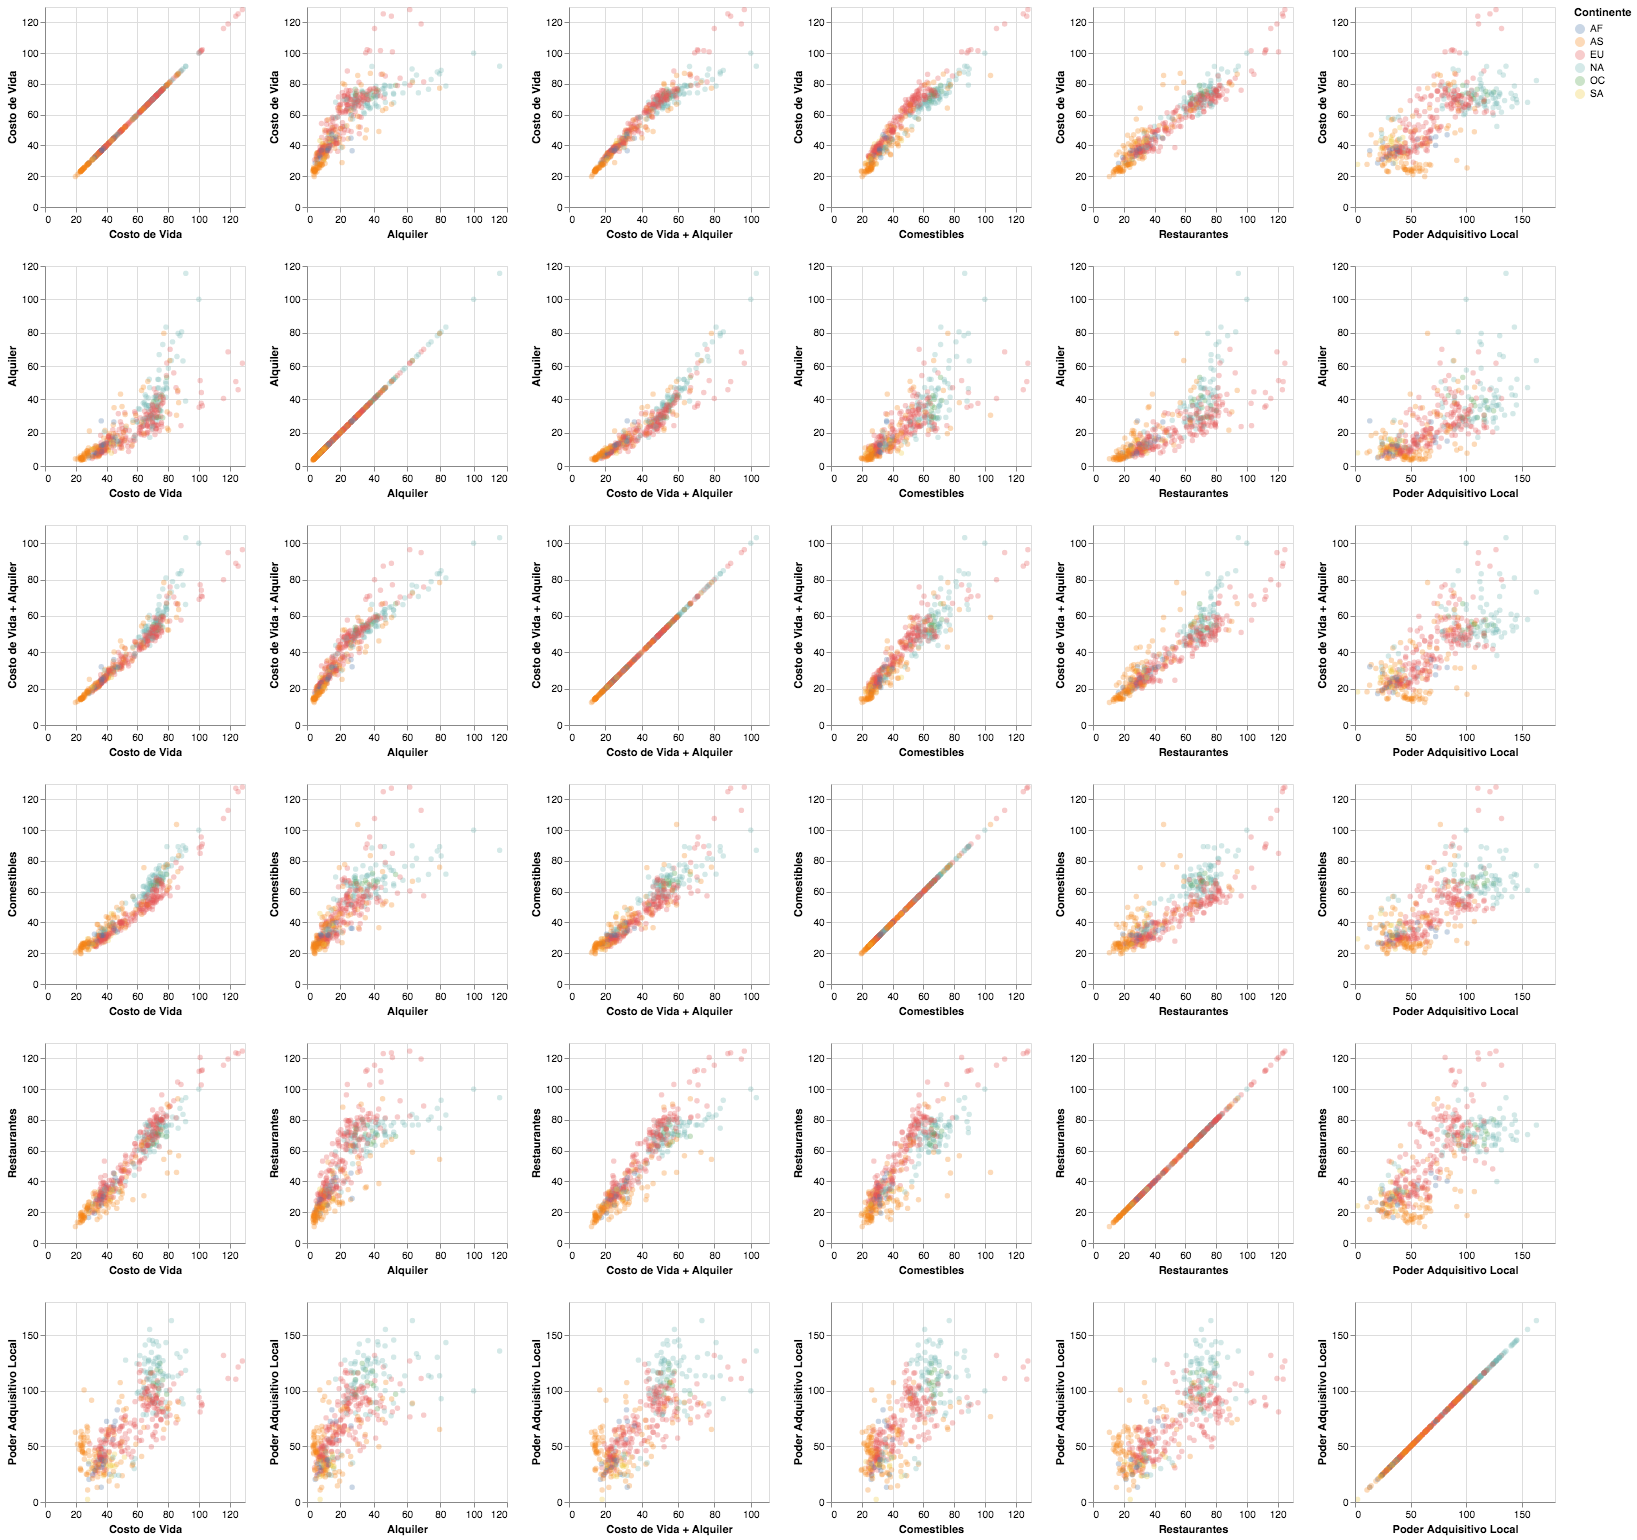

In [15]:
alt.Chart(life_cost.query('year==2020').rename(columns=redable_index_names)).mark_circle(opacity=0.3).encode(
    x = alt.X(alt.repeat("column"), type='quantitative'),
    y = alt.Y(alt.repeat("row"), type='quantitative'),
    color = alt.Color('continent:N', title='Continente')
).properties(
    width=200,
    height=200
).repeat(
    row=list(redable_index_names.values()),
    column=list(redable_index_names.values())
)

## 2. Películas

Este ejercicio utilizará el dataset de películas que viene pre-cargado en `vega_datasets`. Es intereasnte pues posee columnas de distintos tipos y una cantidad relativamente decente de registros.

In [16]:
# data.movies?

In [17]:
movies_raw = data.movies()
movies_raw[9:17]

Title    US_Gross  Worldwide_Gross  US_DVD_Sales  \
9                  Duel in the Sun  20400000.0       20400000.0           NaN   
10                       Tom Jones  37600000.0       37600000.0           NaN   
11                         Oliver!  37402877.0       37402877.0           NaN   
12           To Kill A Mockingbird  13129846.0       13129846.0           NaN   
13                Tora, Tora, Tora  29548291.0       29548291.0           NaN   
14               Hollywood Shuffle   5228617.0        5228617.0           NaN   
15  Over the Hill to the Poorhouse   3000000.0        3000000.0           NaN   
16                          Wilson   2000000.0        2000000.0           NaN   

    Production_Budget Release_Date MPAA_Rating  Running_Time_min  \
9           6000000.0  Dec 31 2046        None               NaN   
10          1000000.0  Oct 07 1963        None               NaN   
11         10000000.0  Dec 11 1968        None               NaN   
12          2000000.0  Dec 25 1962        None               NaN   
13         25000000.0  Sep 23 1970        None               NaN   
14           100000.0  Mar 01 1987        None               NaN   
15           100000.0  Sep 17 2020        None               NaN   
16          5200000.0  Aug 01 2044        None               NaN   

      Distributor Source Major_Genre Creative_Type           Director  \
9            None   None        None          None               None   
10           None   None        None          None               None   
11  Sony Pictures   None     Musical          None               None   
12      Universal   None        None          None               None   
13           None   None        None          None  Richard Fleischer   
14           None   None        None          None               None   
15           None   None        None          None               None   
16           None   None        None          None               None   

    Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
9                     86.0          7.0      2906.0  
10                    81.0          7.0      4035.0  
11                    84.0          7.5      9111.0  
12                    97.0          8.4     82786.0  
13                     NaN          NaN         NaN  
14                    87.0          6.8      1532.0  
15                     NaN          NaN         NaN  
16                     NaN          7.0       451.0

### Ejercicio 2.1

Pre-procesamiento:

Crea un dataframe llamado `movies` tal que sea igual a `movies_raw` salvo que la columna `Release_Date` debes convertrla a tipo `datetime` (recuerda utilizar `pd.to_datetime`).

Este conjunto de datos posee algunos errores, a medida que vayas avanzando en el desarrollo de estas visualizaciones te irás dando cuenta de ellos y __debes solucionarlos!__.

A modo de ejemplo, hay películas que tienen fechas de estreno incorrectas, a cualquiera que sea del año 2020 en adelante hay que restarle 100 años. Ver _King Kong (1933)_ y su fecha de estreno el año 2033.

In [18]:
## Arreglar estrenos a partir del año 2020

## FIX ME PLEASE ##

In [19]:
## Generar dataframe movies a partir de movies_raw
movies = movies_raw
movies["Release_Date"] = pd.to_datetime(movies_raw["Release_Date"])
new_date = movies["Release_Date"].loc[lambda x: x > pd.to_datetime('2020-01-01')] - pd.DateOffset(years=100)
movies["Release_Date"].loc[lambda x: x > pd.to_datetime('2020-01-01')] = new_date
#Verifica si todas fechas son menores a 2020-01-01
(movies["Release_Date"] < pd.to_datetime('2020-01-01')).all()

/Users/IkeMercado/miniconda3/envs/mat281/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


True

Rellena los registros nulos de la columna `Major_Genre` con el valor `Unknown`.

In [20]:
movies['Major_Genre'] = movies['Major_Genre'].fillna('Unknown')

Para que todos los gráficos de aquí en adelante funcionen bien vamos a eliminar los registros/filas/películas que tengan algún elemento nulo dentro de las siguientes columnas:

- `US_Gross`
- `Worldwide_Gross`
- `Production_Budget`
- `Release_Date`
- `IMDB_Rating`

In [21]:
movies.dropna(subset=['US_Gross','Worldwide_Gross','Production_Budget','Release_Date','IMDB_Rating']).head()

Title   US_Gross  Worldwide_Gross  US_DVD_Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   
6                   Following    44705.0          44705.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0   1998-06-12           R               NaN    Gramercy   
1           300000.0   1998-08-07           R               NaN      Strand   
2           250000.0   1998-08-28        None               NaN   Lionsgate   
4          1000000.0   1998-10-09           R               NaN     Trimark   
6             6000.0   1999-04-04           R               NaN   Zeitgeist   

                Source Major_Genre         Creative_Type           Director  \
0                 None     Unknown                  None               None   
1                 None       Drama                  None               None   
2                 None      Comedy                  None               None   
4  Original Screenplay       Drama  Contemporary Fiction               None   
6                 None     Unknown                  None  Christopher Nolan   

   Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
4                    62.0          3.4       165.0  
6                     NaN          7.7     15133.0

### Ejercicio 2.2

Define la función `movies_chart` tal que: 

- Los argumentos sean `year`, `imdb_rating`, `genre`, `budget` y `ww_gross` con valor por defecto `None`. 
    * Cada uno de estos argumentos es una tupla de dos elementos, que corresponden a un valor mínimo y máximo, salvo `genre` que es una tupla de `strings`. 
- Se define el dataframe `data` que es una copia del dataframe `movies`.
- Luego se debe filtrar el dataframe `data` de la siguiente forma:
    * `year` filtra la columna `Release_Date` tal que $year[0] \leq year(Release_Date) \leq year[1]$.
    * `imdb_rating` filtra la columna `IMDB_Rating` tal que $imdb_rating[0] \leq IMDB_Rating \leq imdb_rating[1]$.
    * `genre` filtra la columna `Major_Genre` tal que $genre[0] \in Major\_Genre$.
    * `budget` filtra la columna `Production_Budget` tal que $budget[0] \leq Production_Budget \leq budget[1]$.
    * `ww_gross` filtra la columna `Worldwide_Gross` tal que $ww_gross[0] \leq Worldwide_Gross \leq ww_gross[1]$.
- Se define la variables `chart` que corresponde a un `alt.Chart` que debe:
    * Ser un _scatter plot_ con opacidad `0.4`.
    * El eje horizontal corresponde al presupuesto de producción.
    * El eje vertical corresponde a lo recaudado mundialmente.
    * El color se corresponde con el género principal de la película.
    * El tamaño es proporcional al rating de IMDB.
    * Cada punto debe mostrar un tooltip con:
        - Título de la película.
        - Fecha de lanzamiento.
        - Director.
        - Fuente.
        - Distribuidor.
        - Presupuesto de producción.
        - Recaudación mundial.
        - Género principal.
        - Rating IMDB.
    * El gráfico debe ser interactivo.
- Finalmente, hacer un `display` del gráfico `chart`.
- Retorna `None`.

In [26]:
def movies_chart(year=None, imdb_rating=None, genre=None, budget=None, ww_gross=None):
 
    data = movies.copy()
    
    # Year
    if year is not None:
        date_max = pd.to_datetime(str(year[0]))
        date_min = pd.to_datetime(str(year[1]))
        data = data.loc[lambda x: (date_min <= x['Release_Date'])&(x['Release_Date'] <= date_max)]
    
    # IMDB
    if imdb_rating is not None:
        data = data.loc[lambda x: (imdb_rating[0]<=x['IMDB_Rating'])&(x['IMDB_Rating'] <= imdb_rating[1])]
          
    # Genre
    if genre is not None:
        data = data.loc[lambda x: x['Major_Genre'].isin(genre)]
        
    # Budget
    if budget is not None:
        data = data.loc[lambda x: (budget[0]<=x['Production_Budget'])&(x['Production_Budget'] <= budget[1])]

    # Worldwide Gross
    if ww_gross is not None:
        data = data.loc[lambda x: (ww_gross[0]<=x['Worldwide_Gross'])&(x['Worldwide_Gross'] <= ww_gross[1])]
        
    ## Chart
    chart = (
        alt.Chart(
            data
        ).mark_circle(opacity=0.4).encode(
            x = alt.X('Production_Budget:Q',title='Presupuesto produccion'),
            y = alt.Y('Worldwide_Gross:Q',title='Recaudado mundialmente'),
            color = alt.Color('Major_Genre:N',title='Genero principal'),
            size = alt.Size('IMDB_Rating:Q',legend=None),
            tooltip = [alt.Tooltip('Title:N',title='Titulo'),
                       alt.Tooltip('Release_Date',type='temporal',title='Estreno'),
                       alt.Tooltip('Director:N',title='Director'),
                       alt.Tooltip('Source:N',title='Fuente'),
                       alt.Tooltip('Distributor:N',title='Distribuidor'),
                       alt.Tooltip('Production_Budget',title='Presupuesto'),
                       alt.Tooltip('Worldwide_Gross',title='Recaudacion Mundial'),
                       alt.Tooltip('Major_Genre', title='Genero'),
                       alt.Tooltip('IMDB_Rating',title='Rating IMDB')                
            ]
        ).interactive()
    )

    display(chart)
    return None

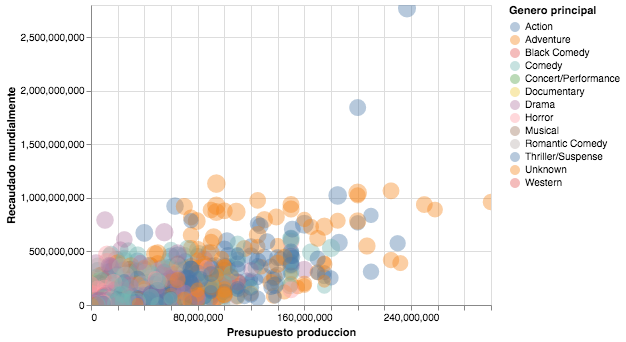

In [27]:
movies_chart()

### Ejercicio 2.3

Generar widgets para cada uno de los argumentos de la función `movies_chart`, los nombres sugeridos son:

- `year_widget` para el argumente `year`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `imdb_widget` para el argumente `imdb`, debe ser un `widget.FloatRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 0.1 unidad.
- `genre_widget` para el argumente `genre`, debe ser un `widget.SelectMultiple`, por defecto deben venir selecionados todos los géneros..
- `budget_widget` para el argumente `budget`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `ww_gross_widget` para el argumente `ww_gross`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.

Todo widget debe tener un valor adecuado para el argumento `description` y configurar el argumento `continuous_update = False`.

In [24]:
year_widget = widgets.IntRangeSlider(
  ## FIX ME PLEASE ##
)

imdb_widget = widgets.FloatRangeSlider(
  ## FIX ME PLEASE ##
)

genre_widget = widgets.SelectMultiple(
   ## FIX ME PLEASE ##
)

budget_widget = widgets.IntRangeSlider(
   ## FIX ME PLEASE ##
)

ww_gross_widget = widgets.IntRangeSlider(
   ## FIX ME PLEASE ##
)

Finalmente, haciendo uso de `interactive`, la función `movies_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de las películas.

Respira profundo y explora tu creación!

In [25]:
movies_dashboard = interactive(
    movies_chart,
    year=year_widget,
    imdb_rating=imdb_widget,
    genre=genre_widget,
    budget=budget_widget,
    ww_gross=ww_gross_widget
)
movies_dashboard

ValueError: Given date string not likely a datetime.